# Superposition and Entanglement in Qiskit
This notebook demonstrates:
1. **Superposition** using a single qubit.
2. **Entanglement** using two qubits.
We will use Qiskit to create circuits, visualize the states, and measure outcomes.

In [6]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet




[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# ===========================
# Import Libraries
# ===========================
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector


## 1. Superposition (Task1)

Task 1: Superposition — Demonstrating a Single Qubit in Superposition
----------------------------------------------------------------------

Quantum Circuit:
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 

Bloch Sphere Visualization:


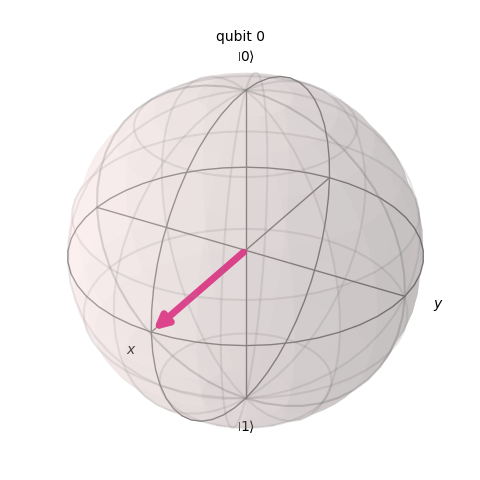


Measurement Results (Superposition):
{'0': 518, '1': 506}

Histogram of Measurement Results:


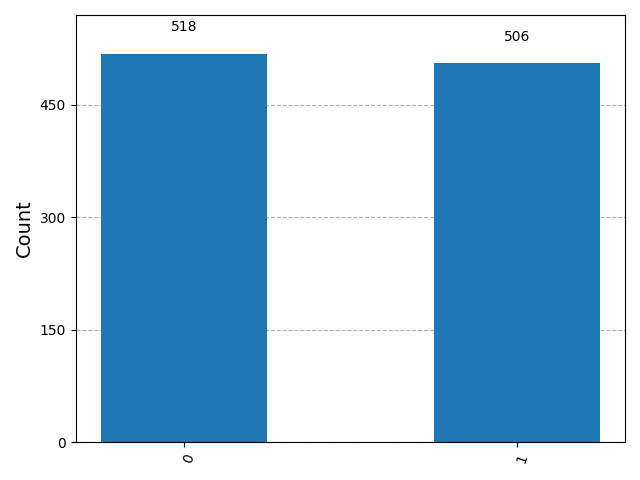

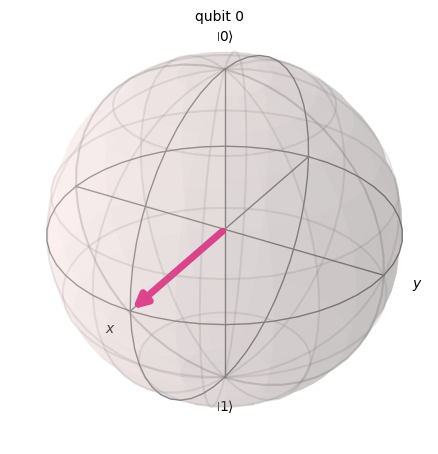

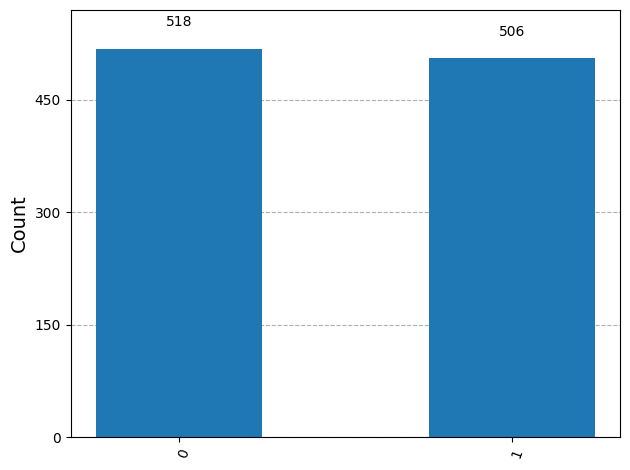

In [9]:
print("Task 1: Superposition — Demonstrating a Single Qubit in Superposition")
print("-" * 70)

# Step 1: Create simulator
simulator = AerSimulator()

# Step 2: Create 1-qubit circuit with measurement
qc = QuantumCircuit(1, 1)
qc.h(0)          # Apply Hadamard gate to create superposition
qc.measure(0, 0) # Measure qubit into classical bit

# Step 3: Display circuit diagram (text mode)
print("\nQuantum Circuit:")
print(qc.draw(output='text'))

# Step 4: Bloch sphere visualization (before measurement)
qc_state = QuantumCircuit(1)
qc_state.h(0)  # Apply Hadamard only, no measurement
state = Statevector.from_instruction(qc_state)

# Render Bloch sphere as image for Colab
fig_bloch = plot_bloch_multivector(state)
fig_bloch.savefig("bloch.png")
print("\nBloch Sphere Visualization:")
display(Image("bloch.png"))

# Step 5: Transpile and run simulation
tqc = transpile(qc, simulator)
job = simulator.run(tqc, shots=1024)
result = job.result()
counts = result.get_counts()

# Step 6: Print measurement results
print("\nMeasurement Results (Superposition):")
print(counts)

# Step 7: Histogram visualization
fig_hist = plot_histogram(counts)
fig_hist.savefig("histogram.png")
print("\nHistogram of Measurement Results:")
display(Image("histogram.png"))

## 2. Entanglement (Task2)

Task 2: Entanglement — Demonstrating a 2-Qubit Bell State
----------------------------------------------------------------------

Quantum Circuit:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 

Bloch Sphere Visualization:


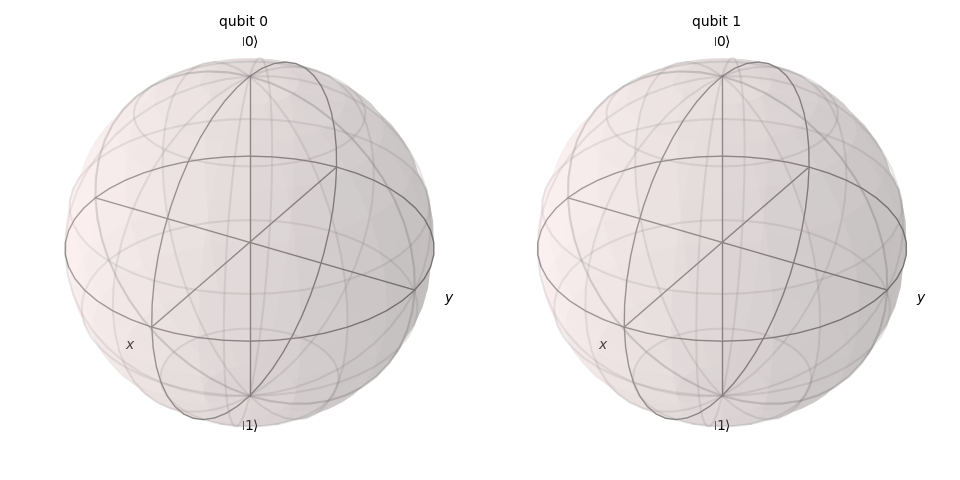


Measurement Results (Entanglement):
{'00': 508, '11': 516}

Histogram of Measurement Results:


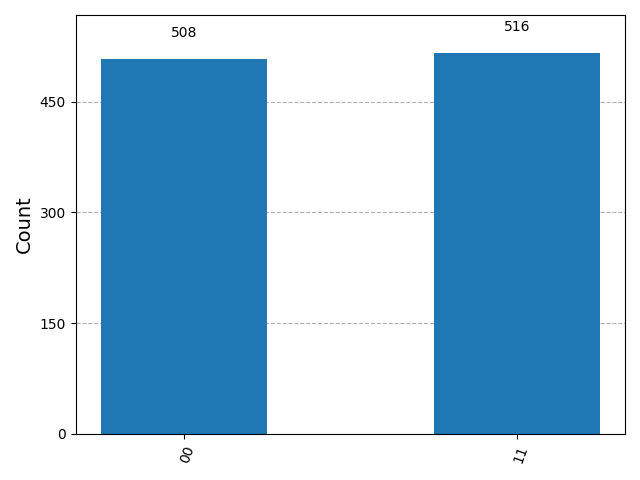

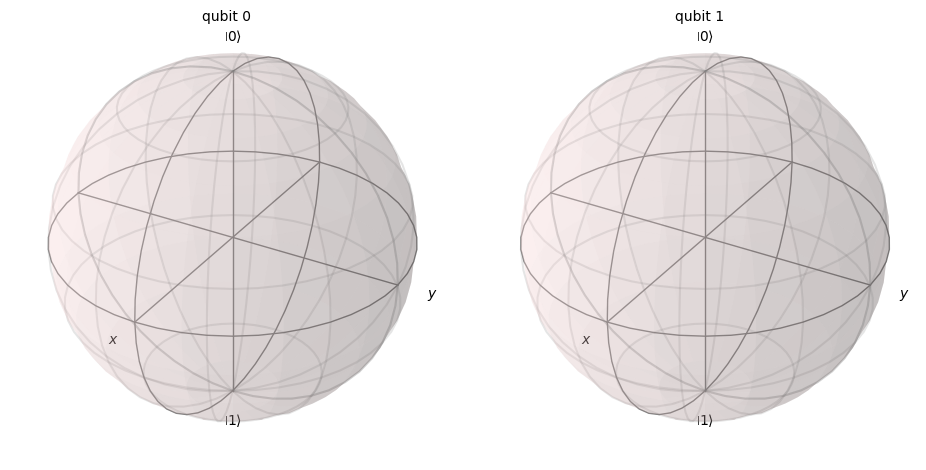

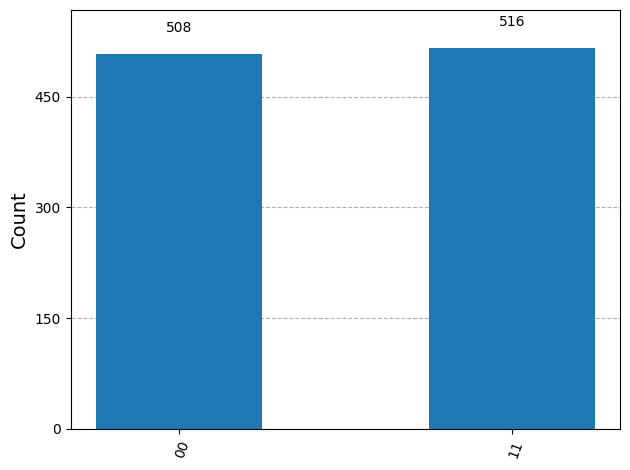

In [10]:
print("Task 2: Entanglement — Demonstrating a 2-Qubit Bell State")
print("-" * 70)

# Step 1: Create simulator
simulator = AerSimulator()

# Step 2: Create 2-qubit circuit
qc_ent = QuantumCircuit(2, 2)
qc_ent.h(0)      # Apply Hadamard to qubit 0
qc_ent.cx(0, 1)  # Apply CNOT to entangle qubit 0 and 1
qc_ent.measure([0,1], [0,1])  # Measure both qubits

# Step 3: Display circuit diagram (text mode)
print("\nQuantum Circuit:")
print(qc_ent.draw(output='text'))

# Step 4: Bloch sphere visualization (before measurement)
# Note: For 2 qubits, Bloch multivector shows individual qubit states
state_ent = Statevector.from_instruction(qc_ent.remove_final_measurements(inplace=False))
fig_bloch = plot_bloch_multivector(state_ent)
fig_bloch.savefig("bloch_ent.png")
print("\nBloch Sphere Visualization:")
display(Image("bloch_ent.png"))

# Step 5: Transpile and run simulation
tqc_ent = transpile(qc_ent, simulator)
job_ent = simulator.run(tqc_ent, shots=1024)
result_ent = job_ent.result()
counts_ent = result_ent.get_counts()

# Step 6: Print measurement results
print("\nMeasurement Results (Entanglement):")
print(counts_ent)

# Step 7: Histogram visualization
fig_hist_ent = plot_histogram(counts_ent)
fig_hist_ent.savefig("histogram_ent.png")
print("\nHistogram of Measurement Results:")
display(Image("histogram_ent.png"))